In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#dataframe = pd.read_csv(r"indicadoresTipoPalabra_suma_CLASS.csv")
#dataframe = pd.read_csv(r"indicadoresTipoPalabra_umbral1_CLASS.csv")
dataframe = pd.read_csv(r"indicadoresTipoPalabra_umbral0.5_no_mean_CLASS.csv")
dataframe

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,VERB_VERB,VERB_ADV,ADV_NOUN,ADV_ADJ,ADV_VERB,ADV_ADV,CLASS
0,29.814597,0.945609,9.577688,0.000000,6.800851,0.000000,0.642470,0.000000,5.435837,0.303176,2.453069,0.000000,0.000000,0.0,0.000000,0.0,entailment
1,29.092507,4.735214,5.257172,0.000000,4.513306,8.615627,0.600425,0.000000,11.058411,1.788771,2.480298,0.000000,0.000000,0.0,0.000000,0.0,entailment
2,16.572224,1.849449,5.897130,0.000000,6.348649,1.392652,4.144476,0.000000,1.746275,0.347017,3.661071,0.000000,0.000000,0.0,0.000000,0.0,contradiction
3,9.043169,0.000000,5.331275,0.000000,2.620311,0.000000,0.360311,0.000000,4.406553,0.000000,6.739488,0.000000,0.000000,0.0,0.000000,0.0,contradiction
4,15.622809,0.000000,1.105674,0.000000,2.219383,0.000000,0.181362,0.000000,3.077783,0.000000,1.128580,0.000000,2.668364,0.0,0.411897,0.0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19.725743,4.861953,1.396518,0.893568,1.963413,5.424360,1.283683,0.000000,3.284759,1.199031,3.380224,0.000000,0.000000,0.0,0.000000,0.0,entailment
96,11.299096,0.000000,0.000000,0.000000,5.716955,0.000000,0.000000,0.000000,0.362618,0.000000,1.437577,0.000000,0.000000,0.0,0.000000,0.0,entailment
97,7.041407,0.000000,5.675516,0.000000,0.000000,0.000000,0.000000,0.000000,3.334945,0.000000,4.193496,0.000000,0.000000,0.0,0.000000,0.0,contradiction
98,7.767476,0.000000,0.898168,0.000000,0.000000,0.000000,0.000000,0.000000,3.150363,0.000000,1.546038,0.000000,0.000000,0.0,0.000000,0.0,contradiction


In [3]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,VERB_VERB,VERB_ADV,ADV_NOUN,ADV_ADJ,ADV_VERB,ADV_ADV
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,19.041175,2.114527,3.614212,0.786733,4.634990,1.583440,0.965469,0.352649,4.206618,0.458541,2.867172,0.357665,0.580838,0.115699,0.330111,0.141434
std,13.612629,4.008308,3.908363,2.144165,6.215911,3.522354,1.659072,1.460394,4.304034,1.031332,3.347506,1.060946,2.095186,0.514403,1.730057,1.017673
min,1.580998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.175392,0.000000,0.514718,0.000000,0.415337,0.000000,0.000000,0.000000,1.610648,0.000000,0.319659,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.474805,0.000000,2.562971,0.000000,2.880180,0.000000,0.278030,0.000000,3.019852,0.000000,1.830627,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.937880,3.692394,5.356768,0.000000,5.977152,0.921151,1.324848,0.000000,4.762785,0.521687,3.727550,0.000000,0.000000,0.000000,0.000000,0.000000
max,73.208999,22.425358,20.784923,11.812714,36.122735,19.306622,9.743642,10.924815,22.219485,7.707878,17.269338,7.196821,13.434893,3.442915,15.162001,8.573847


In [4]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


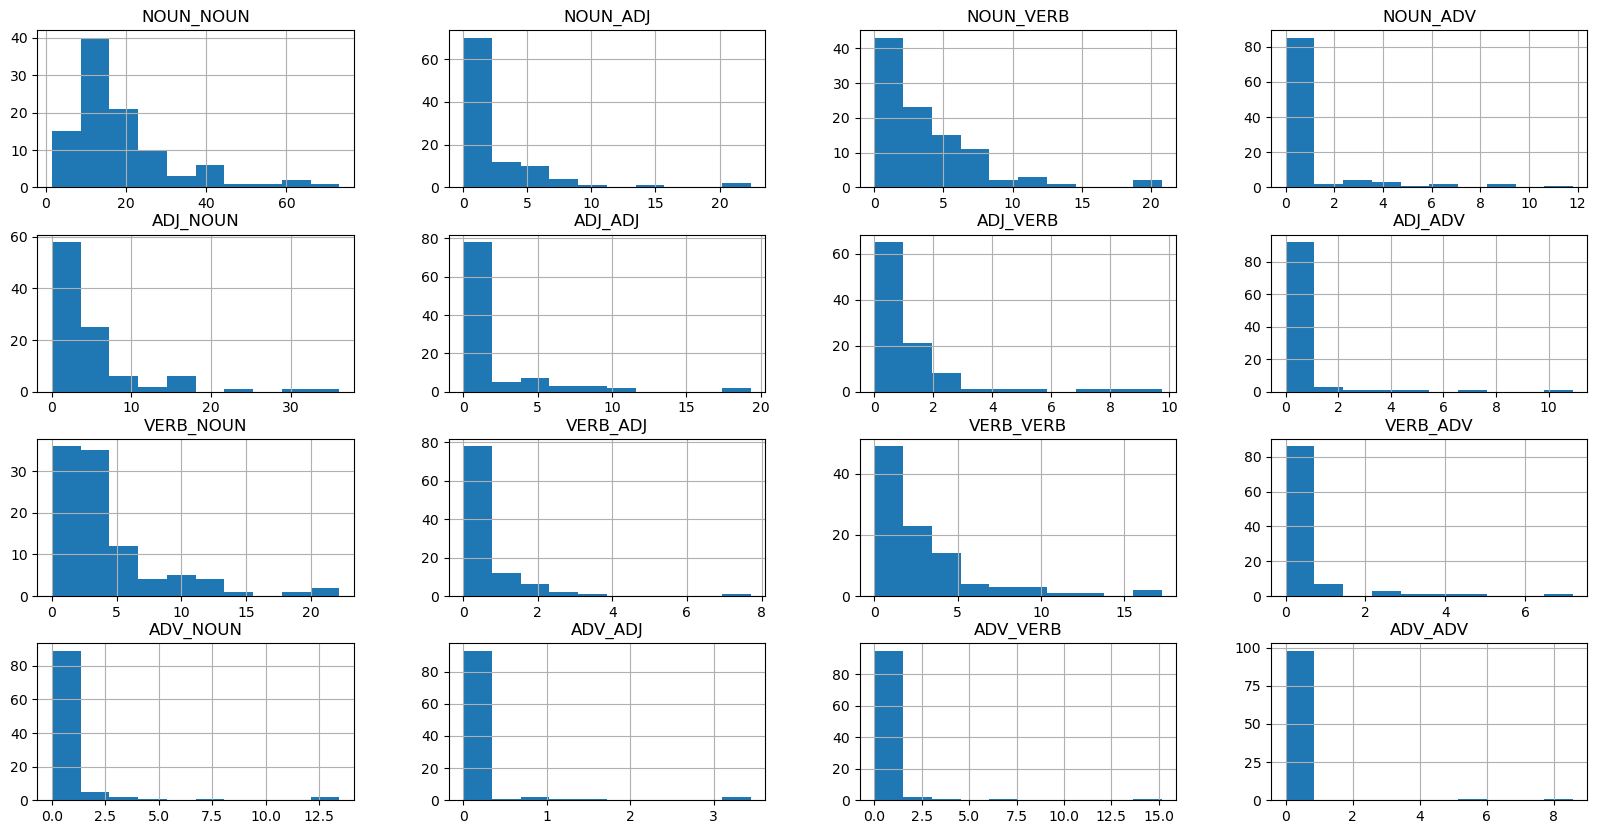

In [5]:
dataframe.hist(figsize=(20,10))
plt.show()

In [6]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [7]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [8]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

C:\Users\Ninja\AppData\Local\Temp\ipykernel_10468\1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_10468\1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 16)

In [9]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [10]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [11]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [12]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [13]:
model.decision_function(X)

array([[ 3.81780954e-01,  2.71924616e-01, -6.53705571e-01],
       [-8.65399591e-01,  7.14427225e-01,  1.50972365e-01],
       [-6.54923196e-01,  8.43042373e-01, -1.88119176e-01],
       [ 3.58672906e-02,  2.45504079e-01, -2.81371369e-01],
       [-9.77994769e-02,  3.29345964e-01, -2.31546487e-01],
       [ 5.66568054e-01,  2.31955874e-01, -7.98523928e-01],
       [-3.42916836e-02,  1.80041418e-01, -1.45749735e-01],
       [-2.03776261e-01,  3.29483310e-01, -1.25707049e-01],
       [-3.21988809e-01, -6.10947354e-01,  9.32936164e-01],
       [ 1.98644935e-01,  6.71390577e-01, -8.70035513e-01],
       [-1.05640015e+00,  5.27717794e-01,  5.28682358e-01],
       [-1.17161958e-01,  4.39602775e-01, -3.22440816e-01],
       [-6.38057154e-01,  4.64216636e-01,  1.73840518e-01],
       [ 2.89817561e-01,  4.88222233e-01, -7.78039794e-01],
       [-4.93525821e-01, -6.45688805e-02,  5.58094702e-01],
       [ 1.80581284e-02,  6.25928673e-02, -8.06509956e-02],
       [-9.72663957e-01,  1.74823332e+00

In [14]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [15]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [16]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [17]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  13 ADV_ADJ 7 ADJ_ADV
Entailment  7 ADJ_ADV 11 VERB_ADV
Neutral  1 NOUN_ADJ 3 NOUN_ADV


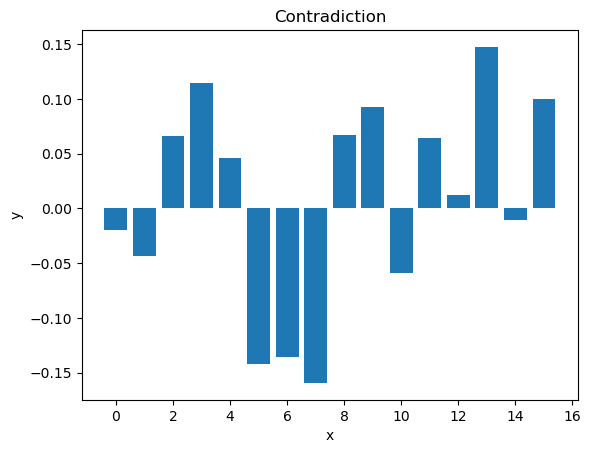

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,16,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

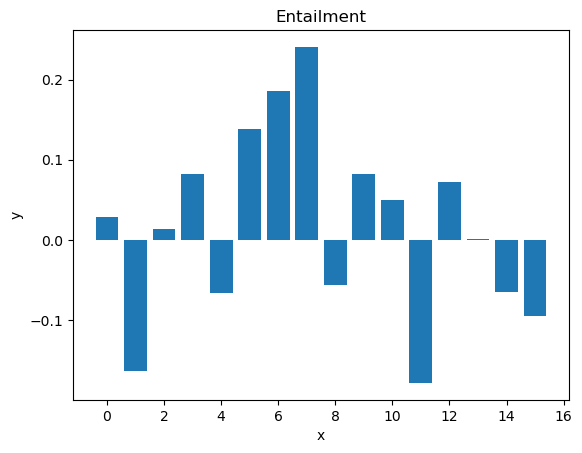

In [19]:
x_v = np.arange(0,16,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

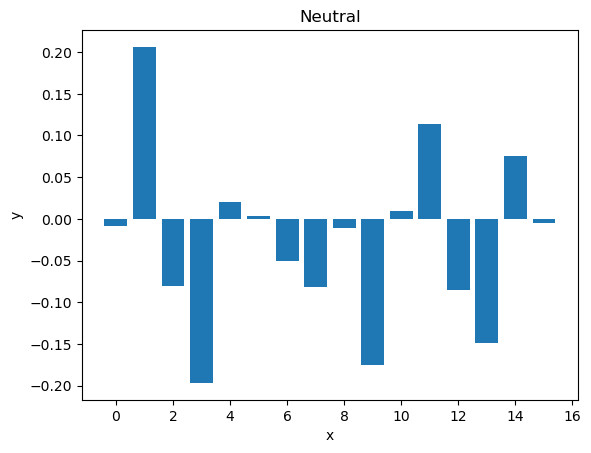

In [20]:
x_v = np.arange(0,16,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [21]:
predictions = model.predict(X)
print(predictions)

['contradiction' 'entailment' 'entailment' 'entailment' 'entailment'
 'contradiction' 'entailment' 'entailment' 'neutral' 'entailment'
 'neutral' 'entailment' 'entailment' 'entailment' 'neutral' 'entailment'
 'entailment' 'contradiction' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'neutral'
 'entailment' 'entailment' 'entailment' 'neutral' 'entailment'
 'contradiction' 'entailment' 'contradiction' 'entailment' 'neutral'
 'entailment' 'entailment' 'neutral' 'neutral' 'neutral' 'entailment'
 'contradiction' 'entailment' 'entailment' 'entailment' 'neutral'
 'entailment' 'contradiction' 'neutral' 'entailment' 'entailment'
 'contradiction' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'neutral' 'entailment' 'entailment' 'neutral' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'entailment' 'entailment' 'entailment' 'contradiction'
 'neutral' 'neutral' 'neutral' 'entailment' 'entailment

In [22]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [23]:
X

array([[29.81459746,  0.94560911,  9.5776875 , ...,  0.        ,
         0.        ,  0.        ],
       [29.09250657,  4.73521405,  5.25717238, ...,  0.        ,
         0.        ,  0.        ],
       [16.5722238 ,  1.84944902,  5.89712995, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 7.04140747,  0.        ,  5.67551607, ...,  0.        ,
         0.        ,  0.        ],
       [ 7.76747555,  0.        ,  0.8981683 , ...,  0.        ,
         0.        ,  0.        ],
       [15.12100993,  0.        ,  0.07423799, ...,  0.        ,
         0.        ,  0.        ]])

In [38]:
model.score(X,y)

0.58

In [39]:
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [40]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.388889 (0.102439)


c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [41]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.5


In [42]:
print(confusion_matrix(Y_validation, predictions))

[[0 4 0]
 [0 3 0]
 [0 1 2]]


In [43]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.00      0.00      0.00         4
   entailment       0.38      1.00      0.55         3
      neutral       1.00      0.67      0.80         3

     accuracy                           0.50        10
    macro avg       0.46      0.56      0.45        10
 weighted avg       0.41      0.50      0.40        10



c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
#X_new = pd.DataFrame()
#model.predict(X_new)